# Logistic Regression using Neural Network: Part -2

Welcome to the 4th Lab of 42028: Deep Learning and CNN!

In this week you will be implementing a Logistic Regression classifier using Neural Network. Specifically, you will implement the activation function, cost/loss function and gradient descent algorithm. 

So lets get started!

## Binary Classification (Logistic Regression) Overview


<img src='http://drive.google.com/uc?export=view&id=1LFtuvxhDn1rbZjeuzw2uAXI6Y9I5qyaa' alt='Conv'>



Activation function $a = \sigma( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

Loss function $L(a, y) = -y\log a+(1-y)\log(1-a)$ 



<img src='http://drive.google.com/uc?export=view&id=1TrjdisDOCqqj0uaAC9zkPGpEAXBEtRA2' alt='Conv'>






## Tasks: 

1. Complete the implementation of Sigmoid activation function 
2. Complete the implementation of the Log loss cost function
3. Complete the implementation of Gradient Descent algorithm
4. Train and test the logistic classifier to classify cats and dogs


In [1]:
## Import the required packages ##
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

import os
import h5py
import glob
import cv2
from keras.preprocessing import image

Using TensorFlow backend.


## Task 1: Complete the implementation of Sigmoid activation function 

A sigmoid function is of a form:

$\sigma( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

Let  $z=w^T x + b,$

Hence, $\sigma(z) = \frac{1}{1 + e^{-(z)}}$


Write a function below to calculate $\sigma(z)$ is Python.

Hint:

**exp(x)** --> Return e**x. 


**Reference**: https://docs.python.org/2/library/math.html

In [0]:
def sigmoid(z):
    """
    Returns the sigmoid of z

    Arguments:
    z --> A scalar or numpy array of any size.

    Return:
    s --> sigmoid(z)
    """

    ### WRITE YOUR CODE HERE ### (~ 1 line of code)
    
    s = 1/(1+np.exp(-z))
    
    ### END YOUR CODE HERE ###
    
    return s

## Task-2: Implement the negative log-likelihood loss (log loss)

$L(a, y) =\frac{1}{m} \sum_{i=1}^m - y\log a+(1-y)\log(1-a)$ 

Complete the below function to calculate L(a, y) in python


**Hint**: 

Use np.log() for log

Use np.sum for summation 



In [0]:
def loss(A, Y, m):
  
  """
    Returns the average log loss of A and Y

    Arguments:
    A --> A numpy array of any size.
    Y --> A numpy array of any size.
    m --> number of samples

    Return:
    loss(A, Y, m) --> a scalar
  """
  
  ## WRITE YOUR CODE HERE ## (~ 1 line of code)
  
  return -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))

  ### END YOUR CODE HERE ###

## Initialize the weight (w) and bais (b)

**Hint**:

use np.zeros() to initialize w 

Shape of w = (dim, 1)
b = 0

In [0]:
def initialize_weight_bias(dim):
  """
  Initialize the weight (W) and bias (b)
  
  return w and b
  """
  ## WRITE YOUR CODE HERE ## (~ 2 line of code)
  
  w = np.zeros((dim,1))
  b = 0
  
  ### END YOUR CODE HERE ###
  
  return w,b

## Task-3: Implement Gradient Descent (GD):

### Step -1: Forward Pass equations:

$A = \sigma(W^TX + b)$

$ cost = L(A, Y)$ --> Loss function implemented above



### Step-2: Back Propagation equations:

**Calculate $dw$ and $db$**

$ dz = \frac{1}{m} * (A - Y)$

$ dw = \frac{1}{m} X (A - Y)^T $  --> Hint: use $np.dot(X, dz^T)$

$ db = \frac{1}{m} \sum_{i=1}^m (A - Y)$ --> Hint: use $np.sum(dz)$


### Step-3: Update the value of $w$ and $b$:**

$w = w - \alpha dw$

$b = b - \alpha dw$



In [0]:
def gradient_descent(w, b, X, Y, epochs, learning_rate, show_cost = True):
    """
    Gradient Descent (GD) Algorithm to find the optimum value of W and B
    
    Arguments:
    w --> weights, a numpy array of size (num_px * num_px * 3, 1)
    b --> bias, a scalar
    X --> data of shape (num_px * num_px * 3, number of examples)
    Y --> true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations --> number of iterations of the GD loop
    learning_rate --> learning rate of the gradient descent update rule
    show_cost --> True to displat the loss at every 1000 steps
    
    Returns:
    params --> dictionary containing the weights w and bias b
    grads --> dictionary containing the gradients of the weights and bias with respect to the cost function
    costs --> list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for itr in range(epochs):
        
        
        # FORWARD PASS Operation: Cost and gradient calculation
        ## WRITE YOUR CODE HERE ## (~ 2 line of code)
        
        m = X.shape[1]
        
        A = sigmoid(np.dot(w.T,X)+b)  # compute the activation, Hint: call sigmoid()
        cost =  loss(A, Y, m) # compute cost, Hint: Call the loss()
        ### END YOUR CODE HERE ###
        
        # BACK PROPAGATION Operation (Find gradient(dw), dw and db)
        ## WRITE YOUR CODE HERE ## (~ 3 line of code)
                
        dz= (1/m)*(A - Y)
        dw = np.dot(X,dz.T)
        db = np.sum(dz)
               
        ### END YOUR CODE HERE ###
        
        assert(dw.shape == w.shape)
        #assert(db.dtype == float)
        cost = np.squeeze(cost)
        #assert(cost.shape == ())
        
               
        # Update w and b with dw and db
        # Hint:
        # dw = dw - learning_rate *dw
        # db = db - learning_rate *db
        ## WRITE YOUR CODE HERE ## (~ 2 line of code)
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        ### END YOUR CODE HERE ###
        #print ("Cost after %i epochs: %f" %(itr, cost))
        
        # Record the costs after 100 interations
        if itr % 10 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if show_cost and itr % 10 == 0:
            print ("Cost after %i epochs: %f" %(itr, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Implement the function $predict()$:


In [0]:
def predict(wOptimum, bOptimum, XTest, threshold=0.5):
    '''
    Predict whether the label is 0 or 1 using logistic regression parameters (w, b) learned using Gradient Descent(GD)
    
    Arguments:
    wOptimum --> weights, a numpy array of size (num_px * num_px * 3, 1)
    bOptimum --> bias, a scalar
    XTest --> data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction --> a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = XTest.shape[1]
    
    Y_prediction = np.zeros((1,m))
    wOptimum = wOptimum.reshape(XTest.shape[0], 1)
    
    ## WRITE YOUR CODE HERE ## (~ 2 line of code)
    
    A =  sigmoid(np.dot(wOptimum.T,XTest)+ bOptimum)
 
    Y_prediction = 1. * (A > threshold)
  
    ### END YOUR CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

### Implement the function $fit()$ :

Combine all the above functions to create a logistic regression classifier:

1. Initialize paramenter $w$ and $b$
2. Gradient Descent (Forward Pass --> Back Propagation --> Update $w$, $b$)
3. Evaluate the model on training dataset

In [0]:
def fit(X_train, Y_train, epochs = 2000, learning_rate = 0.5, show_cost = False):
    """
    Builds the logistic regression model by calling the functions we have implemented previously
    
    Arguments:
    X_train --> training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train --> training labels represented by a numpy array (vector) of shape (1, m_train)
    num_iterations --> hyperparameter representing the number of iterations to optimize the parameters
    learning_rate --> hyperparameter representing the learning rate used in the update rule of optimize()
    show_cost --> Set to true to display the cost every 100 iterations
    
    Returns:
    model --> dictionary containing information (costs, Y_prediction_train, w, b, learning_rate,num_iteration) about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (~ 1 line of code)
    w, b = initialize_weight_bias(X_train.shape[0])

    # Gradient descent (~ 1 line of code)
    parameters, grads, costs = gradient_descent(w, b, X_train, Y_train, epochs, learning_rate, show_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict train set samples (~ 1 lines of code)
    Y_prediction_train = predict(w,b,X_train, 0.5)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    
  
    model = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epochs}
    
    return model

In [0]:
def plotLearningCurve(model):
  """
  Helper function to plot the Learning curve
  
  Argument : model (learned paramenters and costs)
  """
  
  plt.plot(model["costs"])
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Cost/Loss Curve")
  plt.show()
  

###  Mount the Google Drive to access the Cats and Dogs Dataset
Reference: https://github.com/ardamavi/Dog-Cat-Classifier



In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Week4-Lab4/Cats-Dogs-dataset-32/

/content/gdrive/My Drive/42028-DL-CNN-2020/Week4-Lab4/Cats-Dogs-dataset-32


In [11]:
!ls

TestData-32  test_x.h5	TrainData-32  train_x.h5


### Helper function to read the Cats and Dogs dataset and return the train and test splits (Don't modify)

In [0]:
def loadDataset():

  ## Read all the train and test images and flatten them for training and testing
  train_path   = "./TrainData-32"
  test_path    = "./TestData-32"
  train_labels = os.listdir(train_path)
  test_labels  = os.listdir(test_path) 

  image_size       = (64, 64)
  num_train_images = 200
  num_test_images  = 100
  num_channels     = 3

  train_x = np.zeros(((image_size[0]*image_size[1]*num_channels), num_train_images))
  train_y = np.zeros((1, num_train_images))
  test_x  = np.zeros(((image_size[0]*image_size[1]*num_channels), num_test_images))
  test_y  = np.zeros((1, num_test_images))

  #----------------
  # TRAIN dataset
  #----------------
  count = 0
  num_label = 0
  for i, label in enumerate(train_labels):
    cur_path = train_path + "/" + label
    #print(glob.glob(cur_path + "/*.jpg"))
    for image_path in glob.glob(cur_path + "/*.jpg"):
      img = image.load_img(image_path, target_size=image_size)
      #print(image_path)
      x   = image.img_to_array(img)
      x   = x.flatten()
      x   = np.expand_dims(x, axis=0)
      train_x[:,count] = x
      train_y[:,count] = num_label
      count += 1
      #Read only 100 samples for each class for training 
      if (count==99 or count==199):
        break
    num_label += 1

  #--------------
  # TEST dataset
  #--------------
  count = 0 
  num_label = 0 
  for i, label in enumerate(test_labels):
    cur_path = test_path + "/" + label
    for image_path in glob.glob(cur_path + "/*.jpg"):
      img = image.load_img(image_path, target_size=image_size)
      x   = image.img_to_array(img)
      x   = x.flatten()
      x   = np.expand_dims(x, axis=0)
      test_x[:,count] = x
      test_y[:,count] = num_label
      count += 1
    num_label += 1

  #------------------
  # standardization
  #------------------
  train_x = train_x/255.
  test_x  = test_x/255.


  ## Print the statistics of the data
  print ("train_labels : " + str(train_labels))
  print ("train_x shape: " + str(train_x.shape))
  print ("train_y shape: " + str(train_y.shape))
  print ("test_x shape : " + str(test_x.shape))
  print ("test_y shape : " + str(test_y.shape))

  #-----------------
  # save using h5py
  #-----------------
  h5_train = h5py.File("train_x.h5", 'w')
  h5_train.create_dataset("data_train", data=np.array(train_x))
  h5_train.close()

  h5_test = h5py.File("test_x.h5", 'w')
  h5_test.create_dataset("data_test", data=np.array(test_x))
  h5_test.close()

  return train_x, train_y, test_x, test_y


## Task-4: Create a Logistic Regression model and train it

In [13]:
""" Iris dataset
iris = sklearn.datasets.load_iris()
train_set_x = iris.data[:, :2]
train_set_y = (iris.target != 0) * 1
test_set_x = train_set_x
test_set_y = train_set_y
"""

## Read the Cats and Dogs dataset
train_set_x, train_set_y, test_set_x, test_set_y = loadDataset()

%time 
## Train a Logistic Regression classifier.
model = fit(train_set_x, train_set_y, epochs = 4000, learning_rate = 0.001, show_cost = True)
#print(model)

train_labels : ['cat', 'dog']
train_x shape: (12288, 200)
train_y shape: (1, 200)
test_x shape : (12288, 100)
test_y shape : (1, 100)
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 12.4 µs
train accuracy: 97.5 %


### Evaluate the Trained model on test dataset using the learned $w$ and $b$

In [14]:
## Retrieve w and b from the trained model for prediction
w = model["w"]
b = model["b"]

%time
## Call predict() to test the samples in testset
Y_prediction_test = predict(w,b,test_set_x, 0.6)
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y)) * 100))

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 6.68 µs
test accuracy: 42.00000000000001 %


### Plot the learning curve

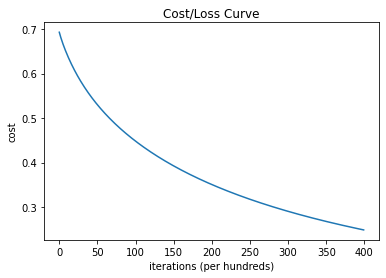

In [15]:
plotLearningCurve(model)

## Optional: Try to write the function for minibatch_GD with the following function signature:

$minibatchGD(X, y, theta, learning-rate=0.1, iter = 10, batch-size=20)$

In [0]:
## OPTIONAL


## Batch Gradient Descent (BGD)

def minibatch_GD(X, y, theta, learning_rate=0.1, iter = 10, batch_size=20):
  
  ### WRITE YOUR CODE HERE ###
  
  
  ### END YOUR CODE ##
    
  return theta, cost_history

      
      